<a href="https://colab.research.google.com/github/zhihaohong52/bc3415/blob/main/vision_transformer_by_google_24_layers_on_sad_and_happy_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tensorflow keras

In [3]:
pip install transformers

In [5]:
import os
import numpy as np
from transformers import ViTFeatureExtractor
from PIL import Image

In [29]:
model = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [30]:
img = Image.open('/content/drive/MyDrive/BC3415/emotion (sad and happy)/train/Happy/0b029961434f74b7016c242764d1e14834a2774d784ed1a33e72494c.jpg')

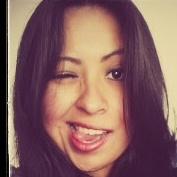

In [31]:
img

In [32]:
img = img.resize((100, 100))

In [33]:
img = model(images=img)

In [34]:
img = img['pixel_values']

In [35]:
img = np.array(img)

In [36]:
img.shape

(1, 3, 224, 224)

In [37]:
img = img.flatten()

In [38]:
img.shape

(150528,)

In [39]:
train_dir = "/content/drive/MyDrive/BC3415/emotion (sad and happy)/train"
test_dir = "/content/drive/MyDrive/BC3415/emotion (sad and happy)/test"
X_train = []
y_train = []
counter = 1
for i in os.listdir(train_dir):
  for j in os.listdir(train_dir + "/" + i):
    try:
      img = Image.open(train_dir + "/" + i + "/" + j)
      img = img.resize((100, 100))
      img = model(images=img)
      img = img['pixel_values']
      img = np.array(img)
      img = img.flatten()
      X_train.append(img)
      y_train.append(i)
    except Exception as e:
      print("counter ", counter, "err ", e)
      counter += 1

In [40]:
X_test = []
y_test = []
counter = 1
for i in os.listdir(test_dir):
  for j in os.listdir(test_dir + "/" + i):
    try:
      img = Image.open(test_dir + "/" + i + "/" + j)
      img = img.resize((100, 100))
      img = model(images=img)
      img = img['pixel_values']
      img = np.array(img)
      img = img.flatten()
      X_test.append(img)
      y_test.append(i)
    except Exception as e:
      print("counter ", counter, "err ", e)
      counter += 1

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6893617021276596
[[102  35]
 [ 38  60]]


In [43]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7914893617021277
[[111  26]
 [ 23  75]]
